In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [132]:
df_model_L = pd.read_csv('./RESULTS training/results L.csv')
df_model_S = pd.read_csv('./RESULTS training/results S.csv')
df_model_X = pd.read_csv('./RESULTS training/results X.csv')
df_model_M = pd.read_csv('./RESULTS training/results M.csv')


df_model_L.head()

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.060669,0.075549,0,0.29883,0.30992,0.21095,0.068608,0.014679,0.017303,0,0.003331,0.003331,0.070016
1,1,0.043936,0.057367,0,0.62916,0.69916,0.64929,0.238750,0.011170,0.011223,0,0.006518,0.006518,0.039869
2,2,0.039459,0.049717,0,0.92320,0.70185,0.82958,0.379350,0.010717,0.008501,0,0.009139,0.009139,0.009157
3,3,0.034602,0.046735,0,0.91556,0.82924,0.89010,0.442040,0.008721,0.007585,0,0.008145,0.008145,0.008145
4,4,0.032071,0.044724,0,0.92818,0.84840,0.91771,0.462010,0.008572,0.007198,0,0.008145,0.008145,0.008145


In [133]:
df_model_L.rename(columns={'               epoch': 'epoch'}, inplace=True)
df_model_S.rename(columns={'               epoch': 'epoch'}, inplace=True)
df_model_X.rename(columns={'               epoch': 'epoch'}, inplace=True)
df_model_M.rename(columns={'               epoch': 'epoch'}, inplace=True)

#print(df_model_L.columns)

Calculate F2-SCORE
(2 * Precision * Recall) / (Precision + Recall)

In [134]:
df_model_L["F1 SCORE"]=(2*df_model_L["   metrics/precision"] * df_model_L["      metrics/recall"]) / (df_model_L["   metrics/precision"] + df_model_L["      metrics/recall"])
df_model_S["F1 SCORE"]=(2*df_model_S["   metrics/precision"] * df_model_S["      metrics/recall"]) / (df_model_S["   metrics/precision"] + df_model_S["      metrics/recall"])
df_model_X["F1 SCORE"]=(2*df_model_X["   metrics/precision"] * df_model_X["      metrics/recall"]) / (df_model_X["   metrics/precision"] + df_model_X["      metrics/recall"])
df_model_M["F1 SCORE"]=(2*df_model_M["   metrics/precision"] * df_model_M["      metrics/recall"]) / (df_model_M["   metrics/precision"] + df_model_M["      metrics/recall"])

df_model_L["F2 SCORE"]= (1+(2)**2) * (df_model_L["   metrics/precision"] * df_model_L["      metrics/recall"]) / (1+(2)**2) * (df_model_L["   metrics/precision"] + df_model_L["      metrics/recall"])
df_model_S["F2 SCORE"]= (1+(2)**2) * (df_model_S["   metrics/precision"] * df_model_S["      metrics/recall"]) / (1+(2)**2) * (df_model_S["   metrics/precision"] + df_model_S["      metrics/recall"])
df_model_X["F2 SCORE"]= (1+(2)**2) * (df_model_X["   metrics/precision"] * df_model_X["      metrics/recall"]) / (1+(2)**2) * (df_model_X["   metrics/precision"] + df_model_X["      metrics/recall"])
df_model_M["F2 SCORE"]= (1+(2)**2) * (df_model_M["   metrics/precision"] * df_model_M["      metrics/recall"]) / (1+(2)**2) * (df_model_M["   metrics/precision"] + df_model_M["      metrics/recall"])

#df_model_S.head()
#df_model_L.head()

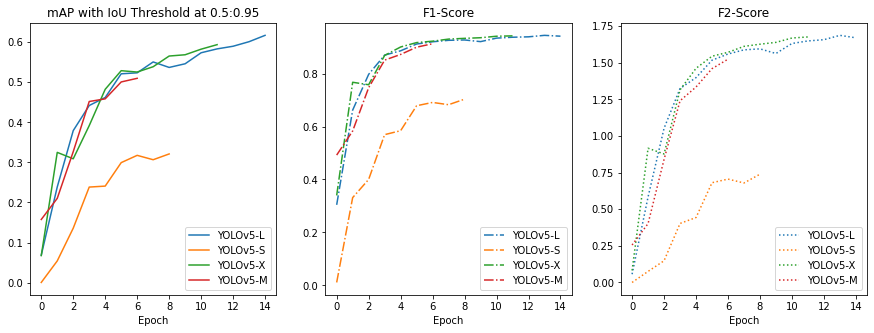

In [135]:
fig, (axs, axs1, axs2) = plt.subplots(1,3,figsize=(15, 5))

#fig.suptitle('metrics/mAP_0.5:0.95')
# mean average precision plot
axs.plot(df_model_L["epoch"], df_model_L["metrics/mAP_0.5:0.95"])
axs.plot(df_model_S["epoch"], df_model_S["metrics/mAP_0.5:0.95"])
axs.plot(df_model_X["epoch"], df_model_X["metrics/mAP_0.5:0.95"])
axs.plot(df_model_M["epoch"], df_model_M["metrics/mAP_0.5:0.95"])
axs.set_title('mAP with IoU Threshold at 0.5:0.95')
axs.set_xlabel("Epoch")
axs.legend(["YOLOv5-L","YOLOv5-S","YOLOv5-X", "YOLOv5-M"],loc="lower right")

# f1 score plot
axs1.plot(df_model_L["epoch"], df_model_L["F1 SCORE"], linestyle='dashdot')
axs1.plot(df_model_S["epoch"], df_model_S["F1 SCORE"], linestyle='dashdot')
axs1.plot(df_model_X["epoch"], df_model_X["F1 SCORE"], linestyle='dashdot')
axs1.plot(df_model_M["epoch"], df_model_M["F1 SCORE"], linestyle='dashdot')
axs1.set_title("F1-Score")
axs1.set_xlabel("Epoch")
axs1.legend(["YOLOv5-L","YOLOv5-S","YOLOv5-X", "YOLOv5-M"],loc="lower right")

# f2 score plot
axs2.plot(df_model_L["epoch"], df_model_L["F2 SCORE"], linestyle='dotted')
axs2.plot(df_model_S["epoch"], df_model_S["F2 SCORE"], linestyle='dotted')
axs2.plot(df_model_X["epoch"], df_model_X["F2 SCORE"], linestyle='dotted')
axs2.plot(df_model_M["epoch"], df_model_M["F2 SCORE"], linestyle='dotted')
axs2.set_title("F2-Score")
axs2.set_xlabel("Epoch")
axs2.legend(["YOLOv5-L","YOLOv5-S","YOLOv5-X", "YOLOv5-M"],loc="lower right")

x=df_model_L["epoch"]
#axs.set_xticks(np.arange(min(x), max(x)+1, 1))